In [2]:
from sklearn.datasets import fetch_openml
# Charger le jeu de données Boston Housing
boston = fetch_openml(name='Boston', version=1)
boston

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Transformer boston en DataFrame
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['MEDV'] = boston['target']  # Ajouter la colonne cible
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1 - Statistiques descriptives de la cible

In [4]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

<Axes: >

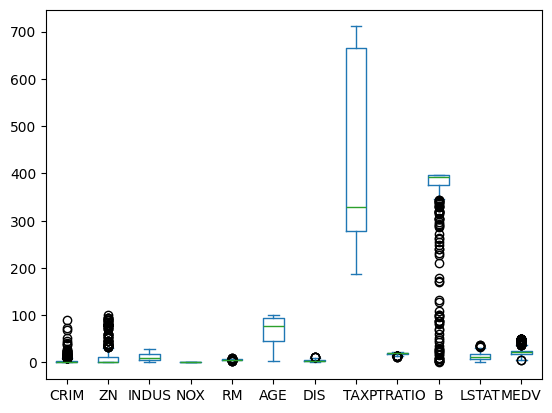

In [7]:
df.plot.box()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df.drop(columns=['MEDV'])))
# print(scaler.data_max_)
# print(scaler.data_min_)
df_scaled = scaler.transform(df.drop(columns=['MEDV']))

MinMaxScaler()


<Axes: >

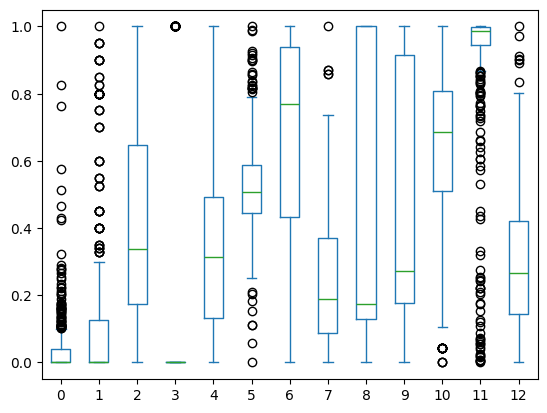

In [9]:
pd.DataFrame(df_scaled).plot.box()

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Initialiser le scaler
# scaler = StandardScaler()

# # Standardiser les colonnes
# columns_to_scale = ['RM', 'LSTAT', 'PTRATIO', 'MEDV']
# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,0.413672,65.2,4.0900,1,296.0,-1.459000,396.90,-1.075562,0.159686
1,0.02731,0.0,7.07,0,0.469,0.194274,78.9,4.9671,2,242.0,-0.303094,396.90,-0.492439,-0.101524
2,0.02729,0.0,7.07,0,0.469,1.282714,61.1,4.9671,2,242.0,-0.303094,392.83,-1.208727,1.324247
3,0.03237,0.0,2.18,0,0.458,1.016303,45.8,6.0622,3,222.0,0.113032,394.63,-1.361517,1.182758
4,0.06905,0.0,2.18,0,0.458,1.228577,54.2,6.0622,3,222.0,0.113032,396.90,-1.026501,1.487503


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [12]:
corr = df.corr()

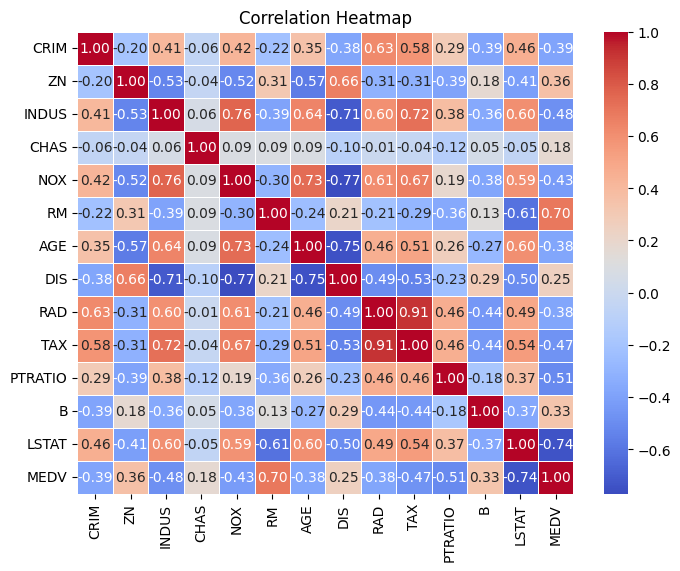

In [13]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
corr_with_medv = corr['MEDV'].sort_values(ascending=False)
print(corr_with_medv)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Diviser les données en ensembles d'entraînement et de test
X = df[['RM']]  # Variable indépendante
y = df['MEDV']  # Variable dépendante
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et ajuster le modèle de régression linéaire
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model_simple.predict(X_test)

# Calculer les métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.7393323947519104
R²: 0.3707569232254777


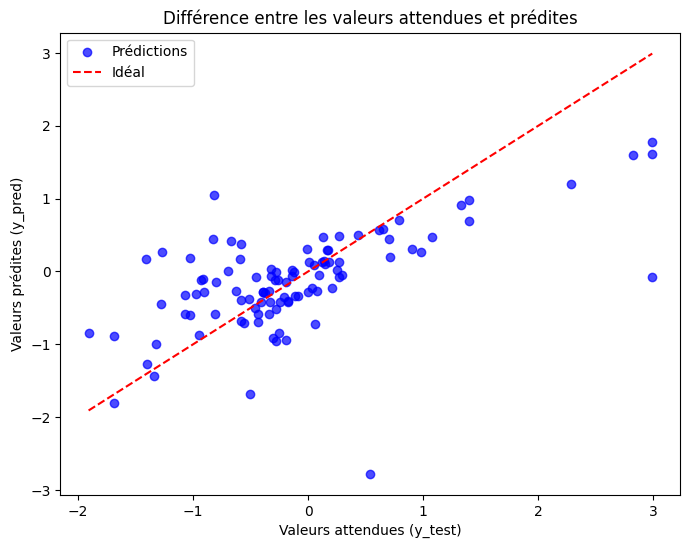

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Idéal')
plt.xlabel('Valeurs attendues (y_test)')
plt.ylabel('Valeurs prédites (y_pred)')
plt.title('Différence entre les valeurs attendues et prédites')
plt.legend()
plt.show()

In [23]:
# Sélection des variables indépendantes et dépendantes
X_multiple = df[['RM', 'LSTAT','PTRATIO','NOX']]  # Variables indépendantes
y_multiple = df['MEDV']  # Variable dépendante

# Diviser les données en ensembles d'entraînement et de test
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

# Créer et ajuster le modèle de régression linéaire multiple
model_multiple = LinearRegression()
model_multiple.fit(X_train_multiple, y_train_multiple)

# Prédire sur l'ensemble de test
y_pred_multiple = model_multiple.predict(X_test_multiple)

# Calculer les métriques
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)

print(f"RMSE: {rmse_multiple}")
print(f"R²: {r2_multiple}")

RMSE: 0.565314106849439
R²: 0.6321094600589734


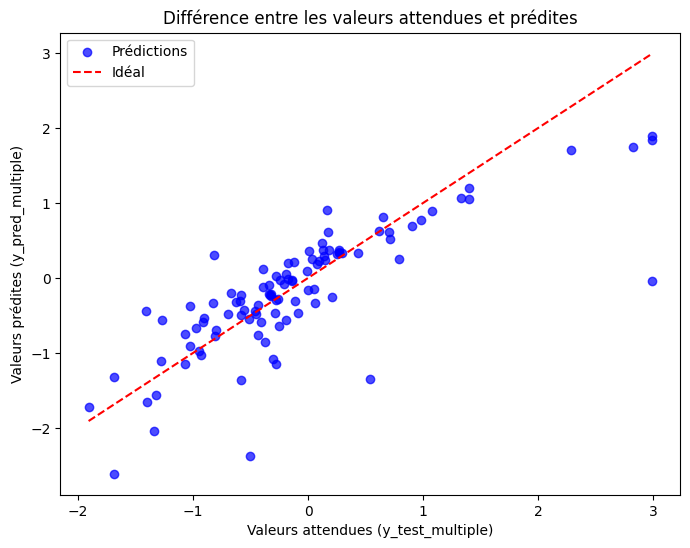

In [24]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test_multiple, y_pred_multiple, alpha=0.7, color='blue', label='Prédictions')
plt.plot([y_test_multiple.min(), y_test_multiple.max()], [y_test_multiple.min(), y_test_multiple.max()], color='red', linestyle='--', label='Idéal')
plt.xlabel('Valeurs attendues (y_test_multiple)')
plt.ylabel('Valeurs prédites (y_pred_multiple)')
plt.title('Différence entre les valeurs attendues et prédites')
plt.legend()
plt.show()

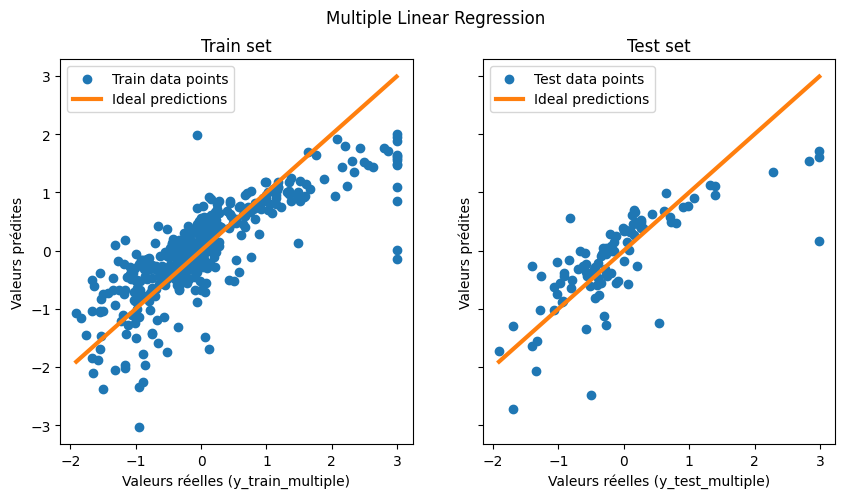

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

# Train set
ax[0].scatter(y_train_multiple, model_multiple.predict(X_train_multiple), label="Train data points")
ax[0].plot(
    [y_train_multiple.min(), y_train_multiple.max()],
    [y_train_multiple.min(), y_train_multiple.max()],
    linewidth=3,
    color="tab:orange",
    label="Ideal predictions",
)
ax[0].set(xlabel="Valeurs réelles (y_train_multiple)", ylabel="Valeurs prédites", title="Train set")
ax[0].legend()

# Test set
ax[1].scatter(y_test_multiple, y_pred_multiple, label="Test data points")
ax[1].plot(
    [y_test_multiple.min(), y_test_multiple.max()],
    [y_test_multiple.min(), y_test_multiple.max()],
    linewidth=3,
    color="tab:orange",
    label="Ideal predictions",
)
ax[1].set(xlabel="Valeurs réelles (y_test_multiple)", ylabel="Valeurs prédites", title="Test set")
ax[1].legend()

fig.suptitle("Multiple Linear Regression")

plt.show()

In [20]:
from sklearn.linear_model import Ridge

# Initialiser le modèle Ridge avec alpha=0.5
reg = Ridge(alpha=0.5)

# Ajuster le modèle sur les données d'entraînement
reg.fit(X_train_multiple, y_train_multiple)

# Prédire sur l'ensemble de test
y_pred_ridge = reg.predict(X_test_multiple)

# Calculer les métriques pour le modèle Ridge
mse_ridge = mean_squared_error(y_test_multiple, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test_multiple, y_pred_ridge)

print(f"RMSE Ridge: {rmse_ridge}")
print(f"R² Ridge: {r2_ridge}")

RMSE Ridge: 0.6082745509279787
R² Ridge: 0.5740699630553628


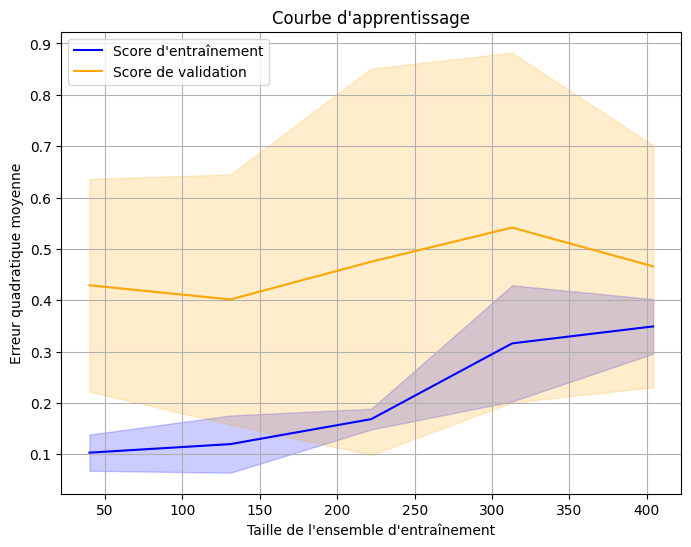

In [21]:
from sklearn.model_selection import learning_curve

# Calculer les scores d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    model_multiple, X_multiple, y_multiple, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Calculer les moyennes et les écarts-types
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Score d'entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_scores_mean, label="Score de validation", color="orange")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="orange")
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Erreur quadratique moyenne")
plt.legend()
plt.grid()
plt.show()